<a href="https://colab.research.google.com/github/Natassiam/machineLearning/blob/teste/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Importando arquivos do github
df = pd.read_csv("https://raw.githubusercontent.com/Natassiam/machineLearning/master/ons_basereduzida1%20(1)%20NOVA.csv", dtype={'Demanda':'category'})
df

,Unnamed: 0,dsc_estado,Modalidade de Operação,nom_tipocombustivel2,nom_tipousinasite,Selecione Tipo de GE Simp 4,Din Instante,Din Instante GE Simp 4,Val Geraenergiacongwh,Val Geraenergiaconmwmed,Demanda
0,1,1,6,2,0,11.95,31/12/2020 00:00,01/12/2020 00:00,8.891672,11.951172,Baixo
1,2,2,6,2,0,1.88,31/12/2020 00:00,01/12/2020 00:00,1.397629,1.878534,Baixo
2,3,0,2,6,1,2494.88,31/12/2020 00:00,01/12/2020 00:00,1856.189991,2494.879020,Alto
3,6,1,2,6,1,168.84,31/12/2020 00:00,01/12/2020 00:00,125.614805,168.837103,Alto
4,7,1,2,6,1,441.78,31/12/2020 00:00,01/12/2020 00:00,328.684873,441.780743,Alto
...,...,...,...,...,...,...,...,...,...,...,...
45096,54972,1,2,6,1,274.47,31/01/1999 00:00,01/01/1999 00:00,204.206300,274.470833,Alto
45097,54973,1,2,6,1,540.77,31/01/1999 00:00,01/01/1999 00:00,402.329300,540.765188,Alto
45098,54974,1,2,6,1,641.83,31/01/1999 00:00,01/01/1999 00:00,477.523600,641.832796,Alto
45099,54975,1,1,6,1,9.31,31/01/1999 00:00,01/01/1999 00:00,6.930200,9.314785,Baixo


In [36]:
df = df.drop(columns=['Unnamed: 0','Din Instante','Din Instante GE Simp 4'])
#df.head()

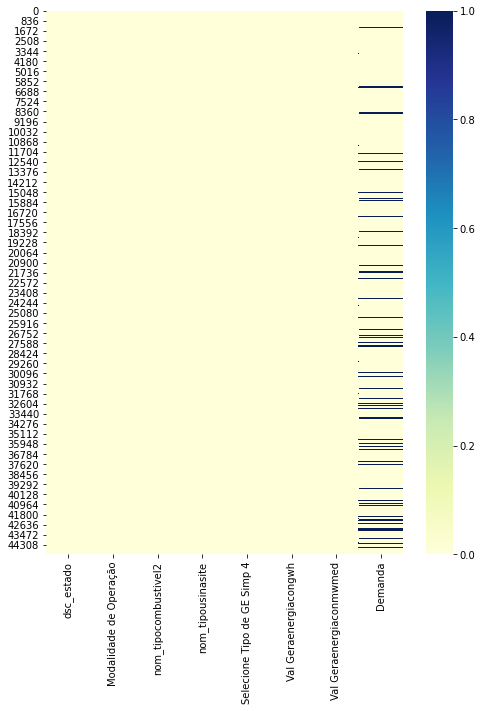

In [37]:
plt.figure( figsize=(8,10) )
sns.heatmap( df.isnull(), cmap= 'YlGnBu', cbar=True);

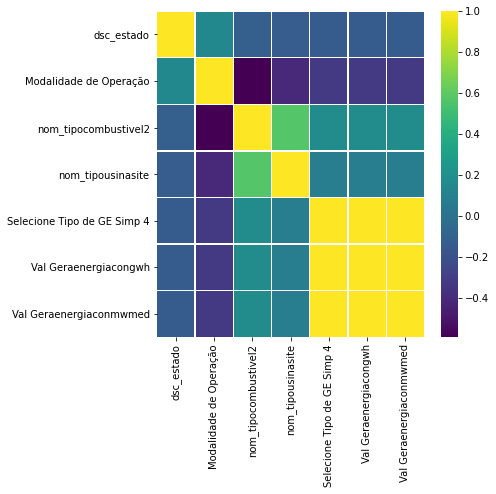

In [38]:
#Analisar a correlação dos dados
corr = df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, linewidths=.4, cmap='viridis');

In [45]:
#df.dtypes
df['Demanda01']= df['Demanda'].cat.codes


In [53]:
from sklearn.preprocessing import StandardScaler
#copiando base original
df_01 = df.copy()
df_01

,dsc_estado,Modalidade de Operação,nom_tipocombustivel2,nom_tipousinasite,Selecione Tipo de GE Simp 4,Val Geraenergiacongwh,Val Geraenergiaconmwmed,Demanda,Demanda01
0,1,6,2,0,11.95,8.891672,11.951172,Baixo,1
1,2,6,2,0,1.88,1.397629,1.878534,Baixo,1
2,0,2,6,1,2494.88,1856.189991,2494.879020,Alto,0
3,1,2,6,1,168.84,125.614805,168.837103,Alto,0
4,1,2,6,1,441.78,328.684873,441.780743,Alto,0
...,...,...,...,...,...,...,...,...,...
45096,1,2,6,1,274.47,204.206300,274.470833,Alto,0
45097,1,2,6,1,540.77,402.329300,540.765188,Alto,0
45098,1,2,6,1,641.83,477.523600,641.832796,Alto,0
45099,1,1,6,1,9.31,6.930200,9.314785,Baixo,1


In [55]:
df_01 = df_01.drop(columns=['Demanda'])

In [56]:
#Escalonamento de dados
funcao_escalonamento = StandardScaler()
dados_escalonados = funcao_escalonamento.fit_transform(df_01)

In [ ]:
dados_escalonados[0:5]

In [59]:
from sklearn.decomposition import PCA
func_PCA = PCA(n_components=2)
dados_PCA = func_PCA.fit_transform(dados_escalonados)

In [60]:
dados_PCA[0:5]

array([[-0.76799916,  0.80728794],
       [-0.90051393,  0.79181783],
       [21.70265037, 10.1157584 ],
       [ 2.45120685, -1.20629648],
       [ 4.70441739,  0.12621102]])

In [62]:
from sklearn.cluster import KMeans
#Distancia do cluster
dist_cluster = []
repeticoes = range(1,20)

In [64]:
for x in repeticoes:
  model_kmeans = KMeans(n_clusters=x)
  model_kmeans.fit(dados_escalonados)
  dist_cluster.append(model_kmeans.inertia_)

In [65]:
print(dist_cluster)

[360808.0, 253298.232929776, 165427.14502412663, 133316.77531909285, 109305.04318559312, 94012.15301689795, 80945.11958677083, 69268.38275761777, 61158.587795119376, 55745.36503019437, 50920.621147355116, 46916.22719918174, 44698.04842914412, 41293.04822963178, 38347.821577105184, 35995.1331500141, 34328.985218659676, 32014.27528702551, 30838.84246970972, 360808.0, 253298.232929776, 165427.14502412663, 133305.34010731973, 110373.97503736081, 94126.28588030284, 80944.8951730806, 69647.91289033636, 61159.059867266056, 55845.92326394113, 50975.61131693954, 46841.26110543925, 44810.814667930026, 41681.294660028885, 39514.91256226143, 38020.545316139294, 35743.039930487954, 32637.985797464313, 32028.728304142838]


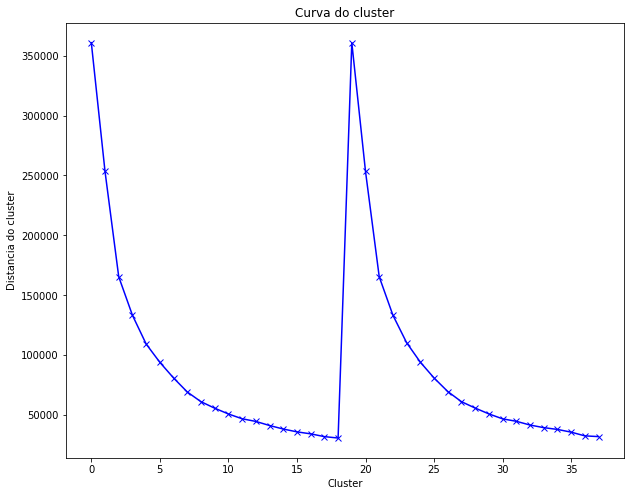

In [67]:
plt.figure(figsize=(10,8))
plt.title('Curva do cluster')
plt.plot(dist_cluster, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('Distancia do cluster');

In [68]:
#Aplicando cluster nos dados
#Definindo 4 clusters
model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(dados_escalonados)
#centroides
centroides =model_kmeans.cluster_centers_
rotulo = model_kmeans.labels_

In [69]:
rotulo

array([0, 0, 1, ..., 3, 3, 3], dtype=int32)

In [83]:
Base_PCA = pd.DataFrame(data= dados_PCA, columns=['Eixo_1','Eixo_2'])
Base_PCA.head()

,Eixo_1,Eixo_2
0,-0.767999,0.807288
1,-0.900514,0.791818
2,21.702650,10.115758
3,2.451207,-1.206296
4,4.704417,0.126211


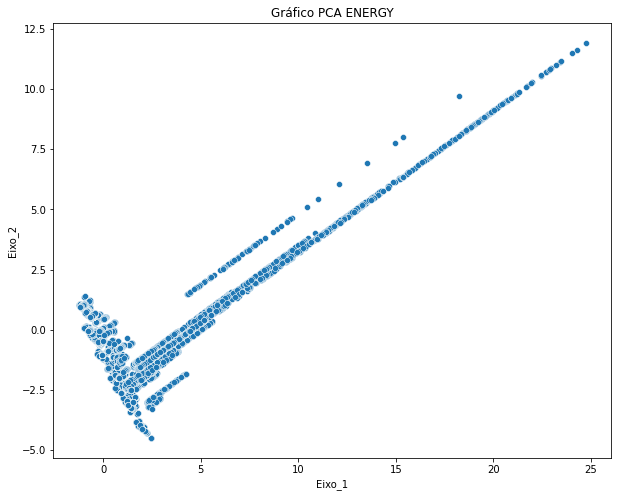

In [84]:
#Plotar Gráfico do PCA
plt.figure(figsize=(10,8))
plt.title('Gráfico PCA ENERGY')
sns.scatterplot(x='Eixo_1', y= 'Eixo_2', data=Base_PCA);


In [85]:
#JUntar dados
A= pd.concat([Base_PCA, pd.DataFrame({'Cluster': rotulo})], axis=1)
A.head()

,Eixo_1,Eixo_2,Cluster
0,-0.767999,0.807288,0
1,-0.900514,0.791818,0
2,21.702650,10.115758,1
3,2.451207,-1.206296,3
4,4.704417,0.126211,3


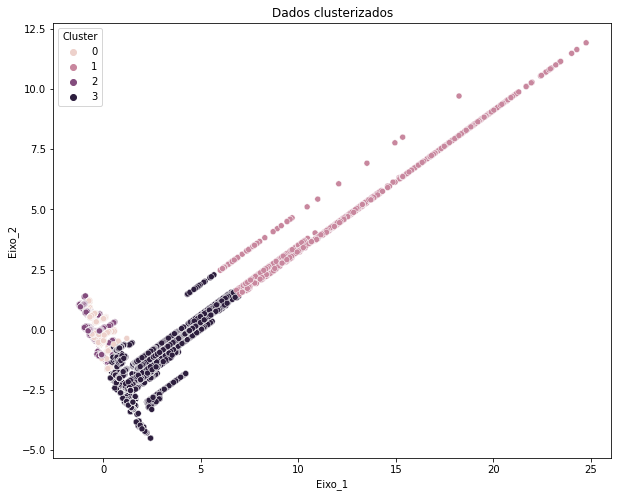

In [86]:
#plotar grafico com 3 eixos

#paleta_cores = ['red','green', 'blue']
plt.figure(figsize=(10,8))
plt.title('Dados clusterizados')
sns.scatterplot(x='Eixo_1', y='Eixo_2', hue='Cluster', data=A);